<a href="https://colab.research.google.com/github/AlexanderKClark/MAT421/blob/main/MAT421_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MAT421 HW7 - Alexander Clark
This homework covers the concepts in [Chapter 20 of the textbook](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter20.00-Numerical-Differentiation.html): **Numerical Differentiation Problem Statement**, **Finite Difference Approximating Derivatives**, **Approximating of Higher Order Derivatives**, and **Numerical Differentiation with Noise**.

## 20.1 Numerical Differentiation Problem Statement
A numerical grid is an evenly spaced set of points over the domain of a function  over some interval. The spacing or step size of a numerical grid is the distance between adjacent points on the grid. One useful Python function to create a regularly spaced array is *linspace*.

## 20.2 Finite Difference Approximating Derivatives
The limit definition of a derivative is $f'(a)=\displaystyle{\lim\limits_{x→a}}\frac{f(x)-f(a)}{x-a}$ as we know from calculus. In finite difference approximations of this slope, we can use values of the function in the neighborhood of the point $x=a$ to achieve the goal. The three presented in the textbooks are:

Forward difference to connect $(x_j,f(x_j))$ and $(x_{j+1},f(x_{j+1}))$: $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$

Backward difference to connect $(x_{j-1},f(x_{j-1}))$ and $(x_{j},f(x_{j}))$: $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{x_j-x_{j-1}}$

Central difference to connect $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$: $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

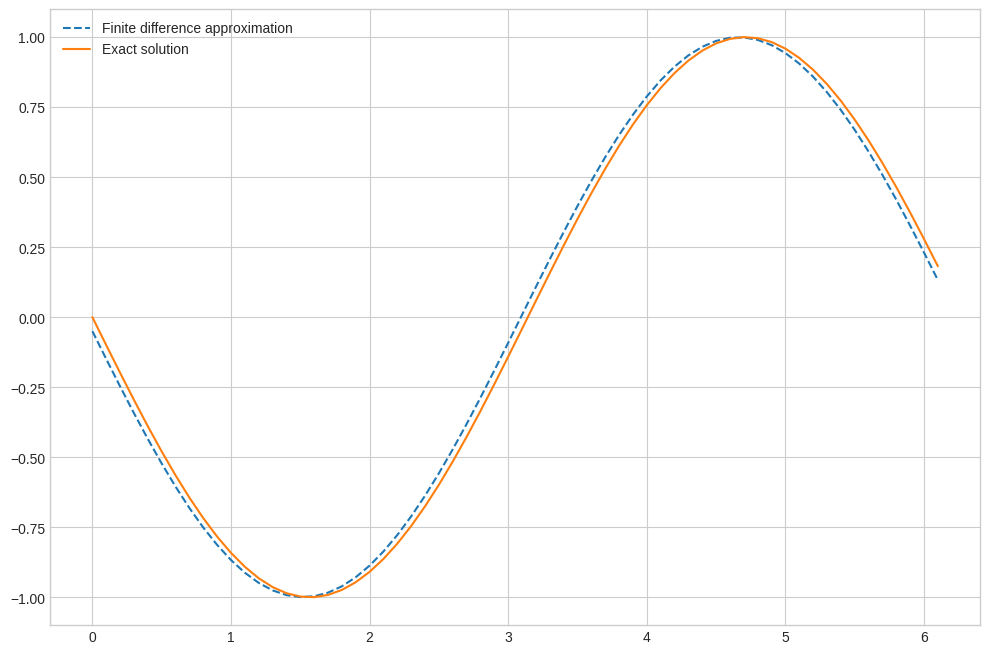

0.049984407218554114


In [3]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

## 20.3 Approximating of Higher Order Derivatives
One can use Taylor series to approximate higher order derivatives. For example, taking the Taylor series around $a=x_j$ and then computing it at $x=x_{j−1}$ and $x_{j+1}$ gives $f''(x_j)\approx \frac{f(x_{j+1}-2f(x_j)+f(x_{j-1}))}{h^2}$.

## 20.4 Numerical Differentiation with Noise
 Sometimes data can be contaminated with noise, meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function.

 Consider $f(x)=\text{cos}(x)$ and $f_{ϵ,\omega}=\text{cos}(x)+ϵ\text{sin}(ωx)$ where $0<ϵ\ll1$ is small and $ω$ is large.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

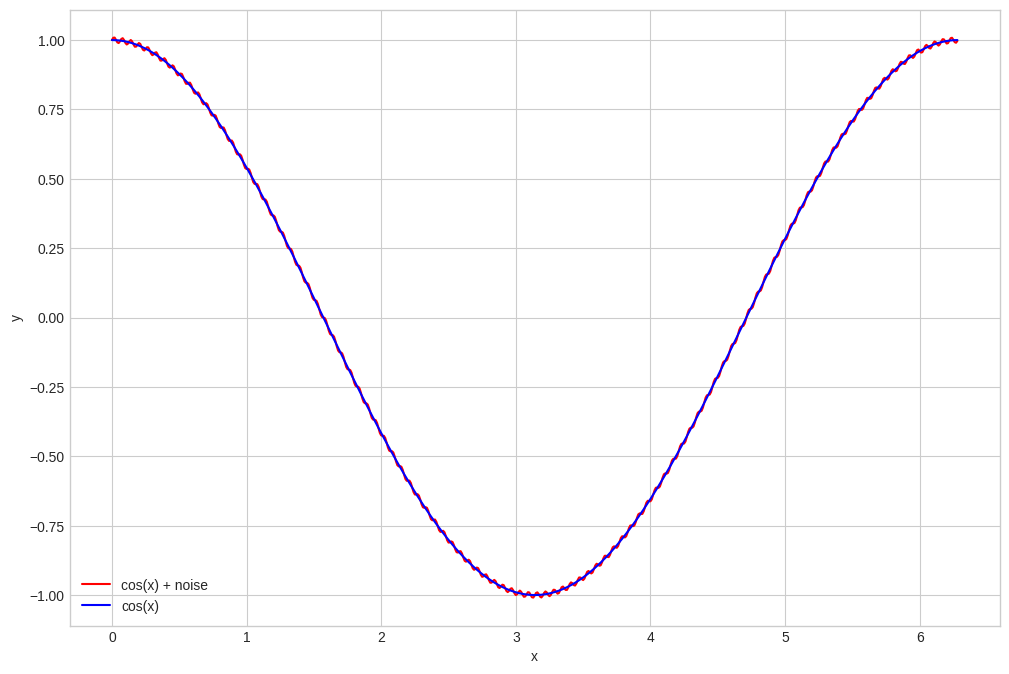

In [5]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Since $ϵω$ may not be small when $ω$ is large, the contribution of the noise to the derivative may not be small. As a result, the derivative (analytic and numerical) may not be usable. For instance, the following figure shows $f^′(x)$ and $f^′_{ϵ,ω}(x)$ for $ϵ=0.01$ and $ω=100$.

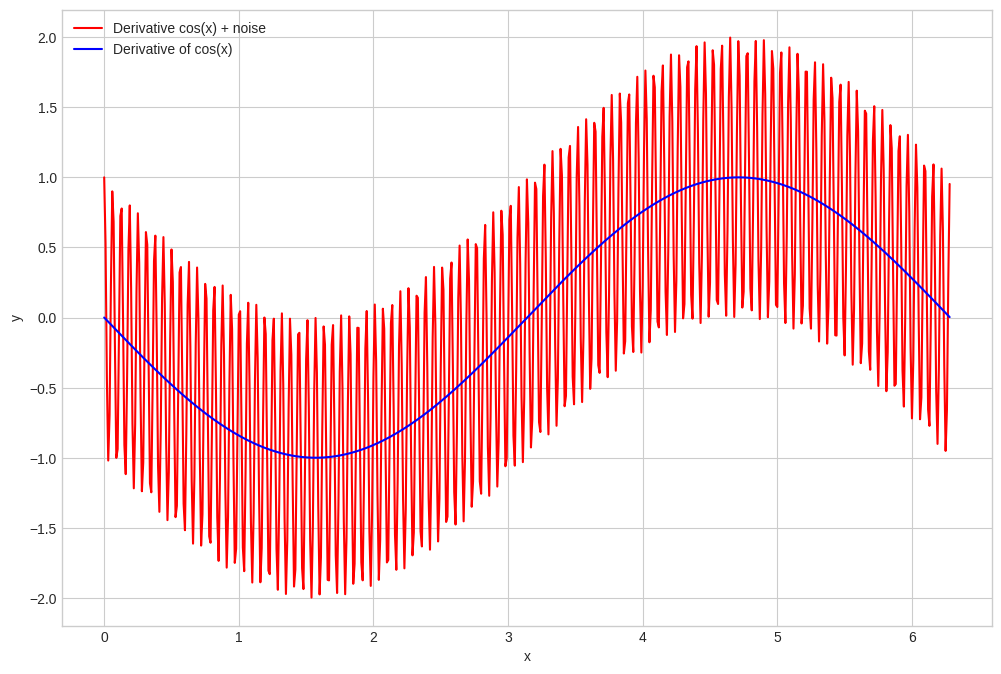

In [6]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()